$$ \bigstar \bigstar \bigstar \bigstar \bigstar \bigstar \bigstar \bigstar \bigstar \bigstar \bigstar \bigstar$$

Normal Distribution $ X_{i} \sim \aleph(0,1)$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

In [3]:
number_of_elements = 10 ** 4

генератор цветов

In [4]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

Генерируем выборку

In [5]:
selection = scipy.stats.norm.rvs(size = number_of_elements)
selection

array([ 0.23067313,  0.23475264, -0.89470258, ..., -0.09822392,
        0.63411423,  2.00894807])

Зададим Эмпирическую Функцию Распределения(ЭФР) $F(y) = \frac{\sum_{i = 1}^{n}I{(x_{i} \leq y)}}{n} $

А так же зададим ее аналог, на уже отсортированной выборке, сумма индикаторов будет попросту равна индексу ближайшего элемента выборки, большего y

In [6]:
def empiric_cdf(y, elements_number) :
    return sum([x < y for x in selection[:(elements_number)]]) / (float(elements_number))
def empiric_cdf_updated(y ,elements_number) :
    return np.where(selection[:(elements_number)] == y)[0] / (float(elements_number))

In [8]:
ns = [10, 25, 50, 100, 1000, 10000] #количество точек

# Строим Графики эмпирической функции распределения , поверх нее наложим реальную функцию рспределения нормального стандартного распределения

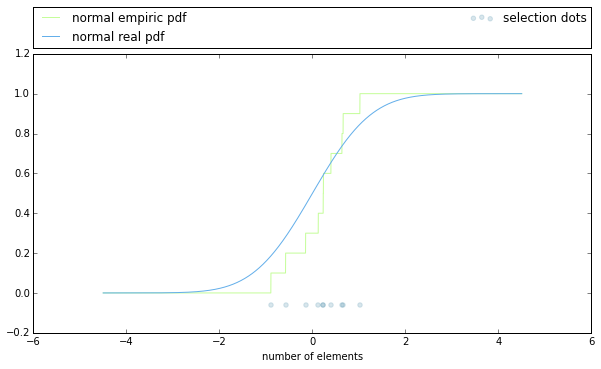

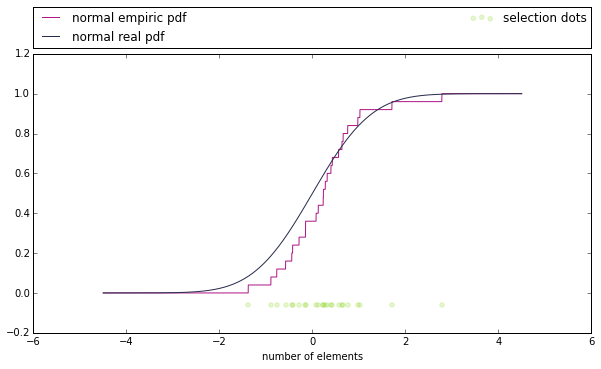

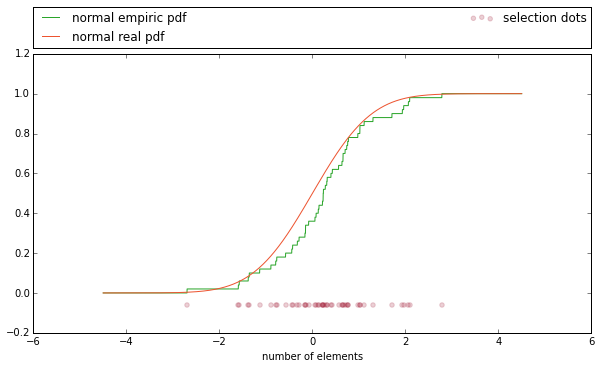

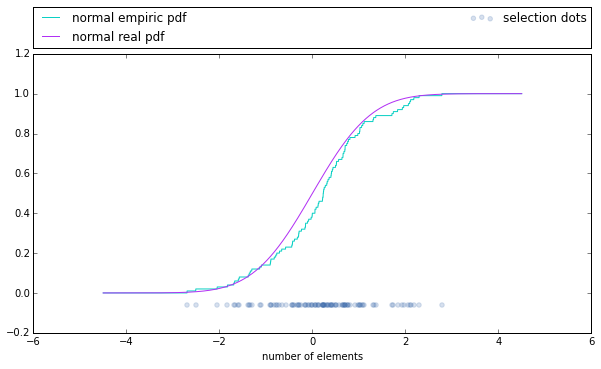

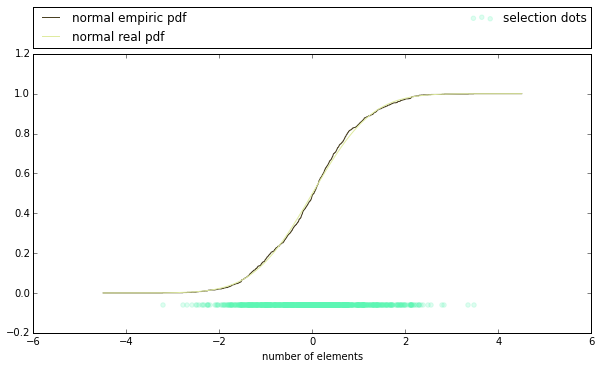

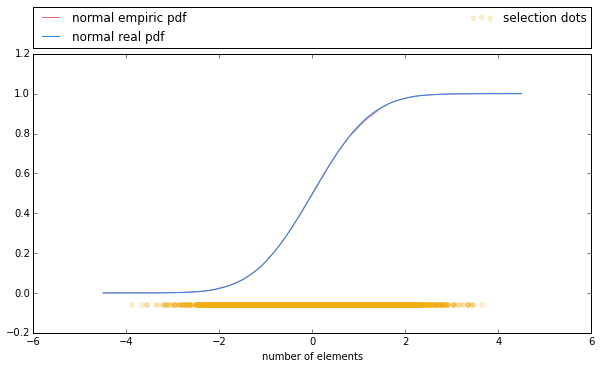

In [10]:
dots_for_pdf = np.linspace(-4.5, 4.5, number_of_elements)
for i in range(len(ns)) :
    plt.figure(figsize=(10,5))
    plt.plot(dots_for_pdf, [empiric_cdf(y, ns[i]) for y in dots_for_pdf], \
             color = color_generator(), label = 'normal empiric pdf')
    plt.plot(dots_for_pdf, [scipy.stats.norm.cdf(y) for y in dots_for_pdf], \
             color = color_generator(), label = 'normal real pdf')
    plt.scatter(selection[:(ns[i])], ns[i] * [0 - 1/16.],\
                color = color_generator(), label = 'selection dots', marker = 'o', alpha = 0.2)
    plt.xlabel('number of elements')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

Отсортируем нашу выборку, чтобы соптимизировать подсчет оценок, иначе, он может считаться огромное кол-во времени


In [11]:
selection.sort()

Cтроим график эмпирической функции распрееления, но для отсортированнной выборки

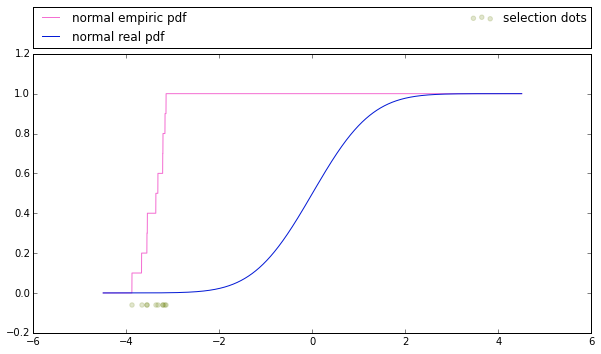

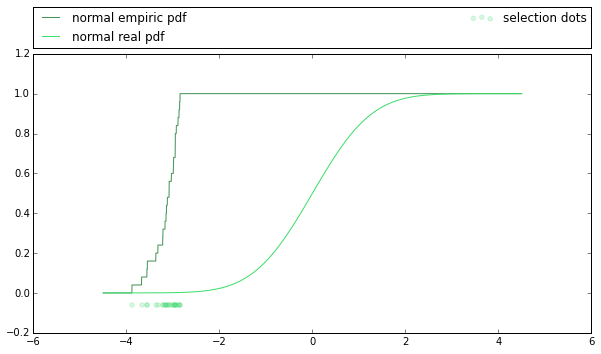

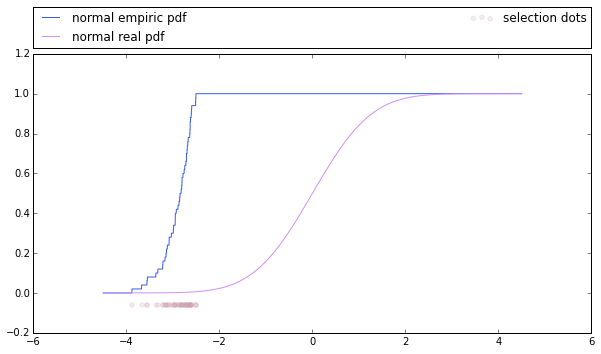

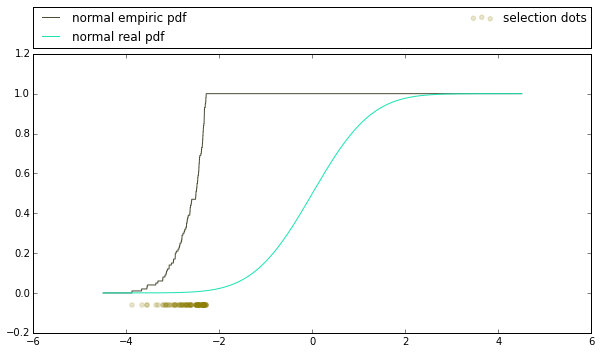

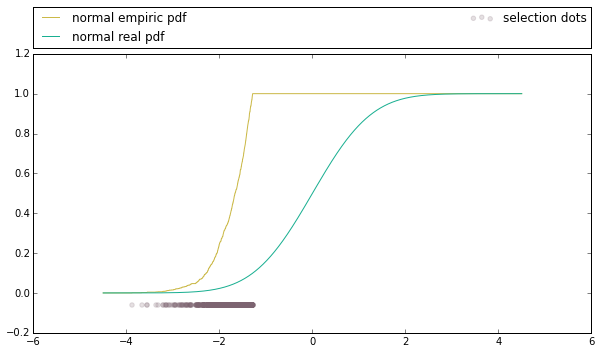

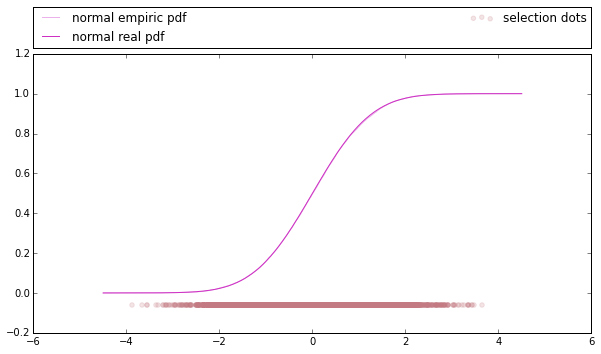

In [13]:
dots_for_pdf = np.linspace(-4.5, 4.5, number_of_elements)
for i in range(len(ns)) :
    plt.figure(figsize=(10,5))
    plt.plot(dots_for_pdf, [empiric_cdf(y, ns[i]) for y in dots_for_pdf],\
             color = color_generator(), label = 'normal empiric pdf')
    plt.plot(dots_for_pdf, [scipy.stats.norm.cdf(y) for y in dots_for_pdf],\
             color = color_generator(), label = 'normal real pdf')
    plt.scatter(selection[:(ns[i])], ns[i] * [0 - 1/16.], color =\
                color_generator(), label = 'selection dots', marker = 'o', alpha = 0.2)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

# Заметим очень важный факт, нам можно не рассматривать супремум на всех точках из $R$ Ведь максимум может быть достигнут лишь в точках выборки. Докажем это, т.к. эмпирическая функция распределения ступенчатая, то мы можем разбить область определения на конечное число интервалов , где она константа. Допустим, супремум был достигнут не в точке выборки, а где-то посреди $i-того$ куска в $x_{0}$. Но т.к. одним из свойств функции распределения является неубывание при росте х, то если мы будем двигаться в сторону уменьшения х от точки $x_{0}$ , функция распределения будет невозрастать, а (ЭФР) константа, значит модуль разности в точке выборки будет $\geq$ чем в точке $x_{0}$


Значит, будем рассматривать лишь точки выборки в качестве подозреваемых на максимум

Предпосчитаем значения функции распределения нормального стандартного, чтобы избавиться от повторных вызовов и пересчетов этой функции

In [14]:
preprocessing = {x : scipy.stats.norm.cdf(x) for x in selection}


In [ ]:
empire_preprocessing = []
for i in xrange(10) :
    empire_preprocessing.append([sum([x < y for x in selection[:(i + 1)]]) / (float(i + 1)) for y in selection])

Тут ищется максимум модуля разности нашего выражения, считается он очень долго, но благодаря сортировке время работы этой ячейки около 15 минут

In [15]:
%%time
diff = [np.max([np.abs(np.where(selection[:(i + 1)] == y)[0] / (float(i + 1)) - preprocessing[y]) for y in selection[:(i + 1)]]) for i in xrange(10000)]


CPU times: user 9min 28s, sys: 6.08 s, total: 9min 34s
Wall time: 9min 58s


# Построим графики модуля разности ЭФР и настоящей ФР
Заметим, что при росте n  ЭФР $\to$ ФР

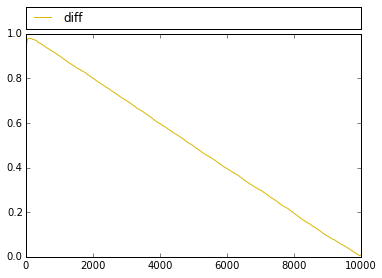

In [16]:
plt.plot(xrange(10000), diff, color = color_generator(), label = 'diff')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

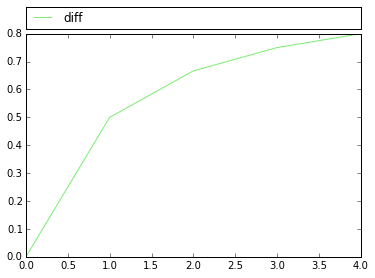

In [17]:
plt.plot(xrange(5), diff[:5], color = color_generator(), label = 'diff')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

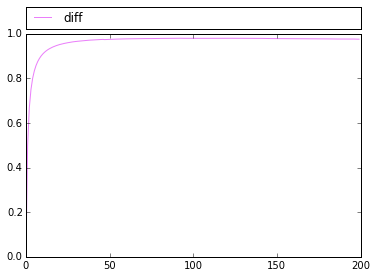

In [19]:
plt.plot(xrange(200), diff[:200], color = color_generator(), label = 'diff')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()